# **Titanic: Dataset Analysis for Survival Prediction**
### Equipo 4:

*   Fabian Trejo
*   Miguel Bermea
*   Eduardo Martinez
*   Samantha Guanipa
*   Francia García
*   Alexia Naredo




## **Libraries and Data Loading**

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Function of minmax scaling that returns a new dataframe
def minmax(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def minmax_scaling(dataframe):
    dataframe_scale = pd.DataFrame()

    for column in dataframe.columns:
        min_value = dataframe[column].min()
        max_value = dataframe[column].max()
        dataframe_scale[column] = dataframe[column].apply(lambda x: minmax(x, min_value, max_value))

    return dataframe_scale

In [ ]:
def heatMap(corr):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
train_set = 'train.csv'
df = pd.read_csv(train_set)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Exploratory Analysis**

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Dataset size
print('Columns:', df.shape[1])
print(list(df.columns))
print('Rows:', df.shape[0])


Columns: 12
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Rows: 891


The 'Name' column contains information about the title of the person, and that the 'Cabin' column contains Section and Number of a cabin. New columns will be created to separate this information for analysis.

In [ ]:
# Creating new column with only title
import re

# Función para extraer el texto deseado
def extraer_texto(text):
    match = re.search(r'(?<=(\,\s))[A-z]+(?=(\.))', text)
    if match:
        return match.group(0)
    return ''

# Aplicar la función a la columna 'texto' y crear la columna 'extracto'
df['Title'] = df['Name'].apply(extraer_texto)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
# Percentage of Missing Cabin Info per Travelling Class
for i in [1, 2, 3]:
  print('Pclass', i, 'No Cabin Info')
  print('-------------------------')
  new_df = df[df['Pclass'] == i]
  print(len(new_df[new_df['Cabin'].isnull()])/new_df.shape[0])
  print()

Pclass 1 No Cabin Info
-------------------------
0.18518518518518517

Pclass 2 No Cabin Info
-------------------------
0.9130434782608695

Pclass 3 No Cabin Info
-------------------------
0.9755600814663951



We can see that most of the passengers of Pclass 2 and 3 had no cabin assigned. Those who did where in section D, E, F and G. First class passengers where in section A, B, C, D, E

In [ ]:
# Missing Values (Percentage)
df.isnull().sum()*100/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Title           0.000000
dtype: float64

As we can see, about a 20% of the data in the *Age* column is missing. Therefore, we will complete it using imputation techniques. For the 'Cabin' column, the 77% of the data is missing, thus, it will be excluded for further analysis. Rg

In [ ]:
df = df.drop('Cabin', axis = 1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

Now we will redefine the data types for each column according to their content.

In [ ]:
# Correcting data types
# Datatypes
types = {'PassengerId':'string',
         'Pclass':'string',
         'Title':'string',
         'Name':'string',
         'Sex':'string',
         'Ticket':'string',
         'Embarked':'string',
         }
df = df.astype(types)
df.dtypes

PassengerId     string
Survived         int64
Pclass          string
Name            string
Sex             string
Age            float64
SibSp            int64
Parch            int64
Ticket          string
Fare           float64
Embarked        string
Title           string
dtype: object

In [ ]:
# Numerical Values
numerical = ['Age', 'SibSp', 'Parch', 'Fare']

# Categorical Values
categorical = ['Pclass', 'Sex', 'Embarked', 'Title']

# ID Columns
id = ['PassengerId', 'Name', 'Ticket']

Within the dataframe, we have numerical, categorical and ID variables. ID columns will not be used when implementing the model, this is because they are unique to each instance (as IDs should be), thus having no effective use to establish relations with other variables. We will only redefine *PassengerID* as the dataframe index column.

In [ ]:
df = df.drop(id[1:], axis = 1)
df = df.set_index(id[0])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


## **Description of Numerical Variables**

### ***Statistics***

In [ ]:
df[numerical].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [ ]:
df[numerical].skew()

Age      0.389108
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

All numerical values have a positive asymmetry (skewness to the right), specially the *Fare* variable.

<Axes: >

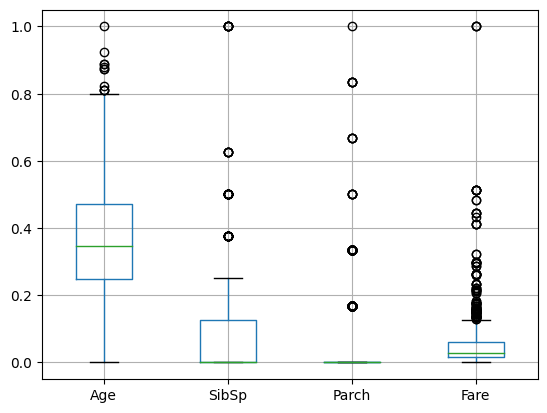

In [ ]:
minmax_scaling(df[numerical]).boxplot()

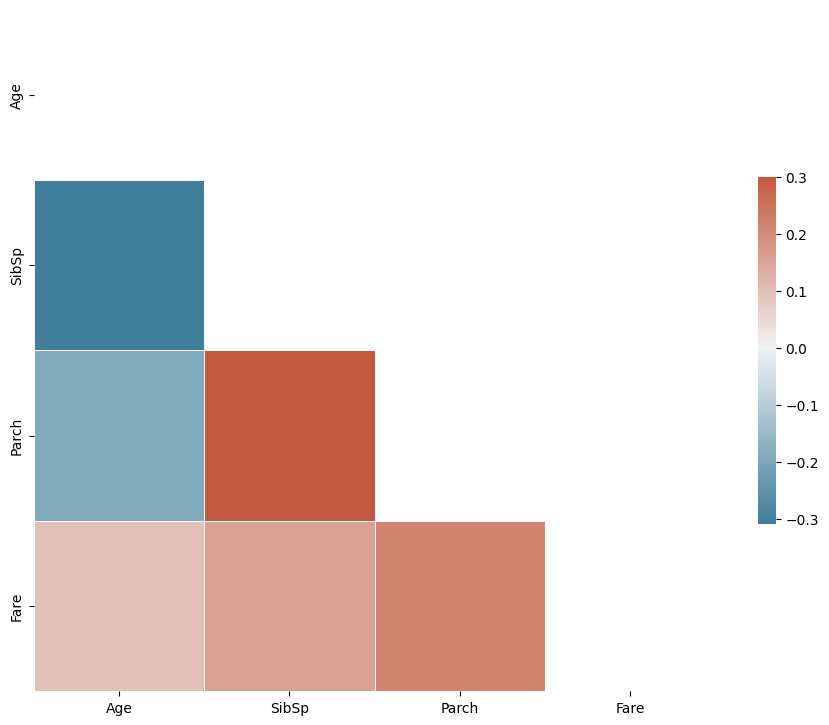

In [ ]:
# Heatmap for numerical variables
numericalCorr = df[numerical].corr()
heatMap(numericalCorr)


### ***Age***

<Axes: >

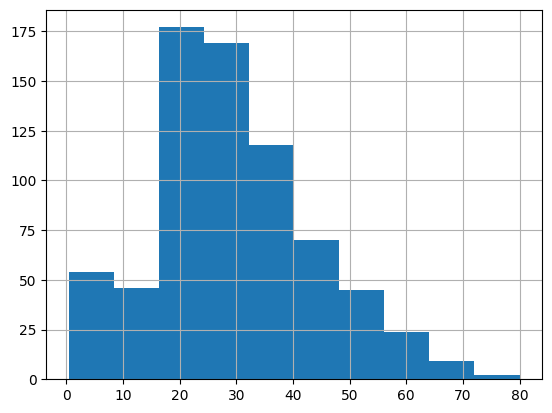

In [ ]:
df["Age"].hist()

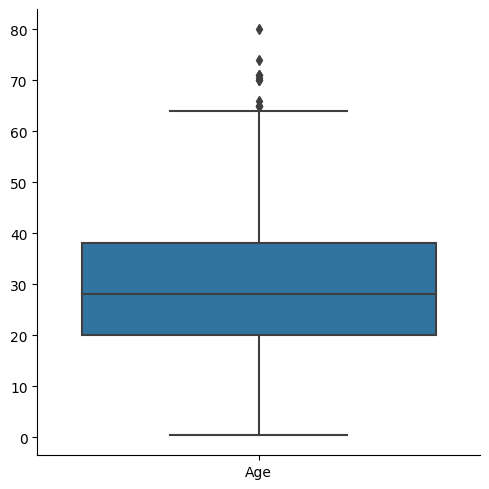

In [ ]:
# Boxplot per variable
sns.catplot(pd.DataFrame(df['Age']), kind='box')

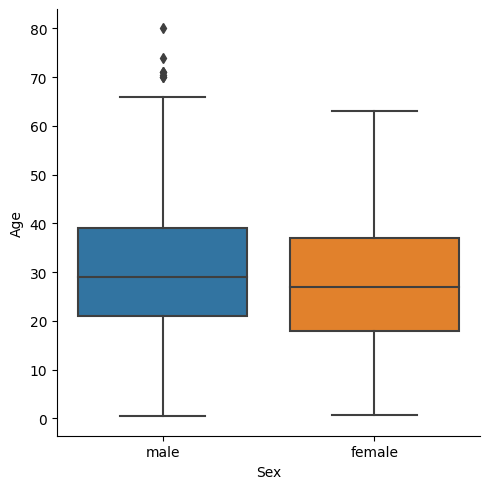

In [ ]:
# Distribution of Age by Sex
sns.catplot(data=df, x="Sex", y="Age", kind="box")

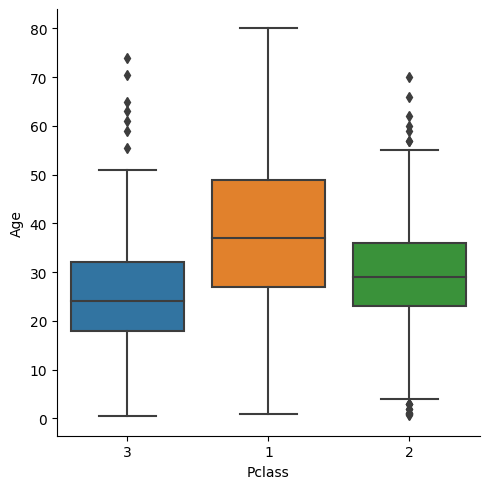

In [ ]:
# Distribution of Age by Pclass
sns.catplot(data=df, x="Pclass", y="Age", kind="box")

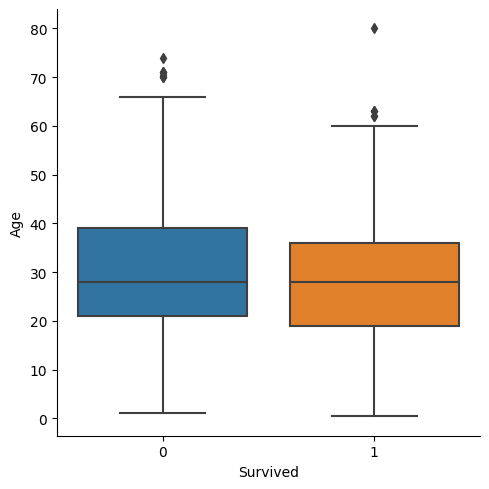

In [ ]:
# Distribution of Age by class Survived
sns.catplot(data=df, x="Survived", y="Age", kind="box")

### ***Number of Siblings/Spouses***

<Axes: >

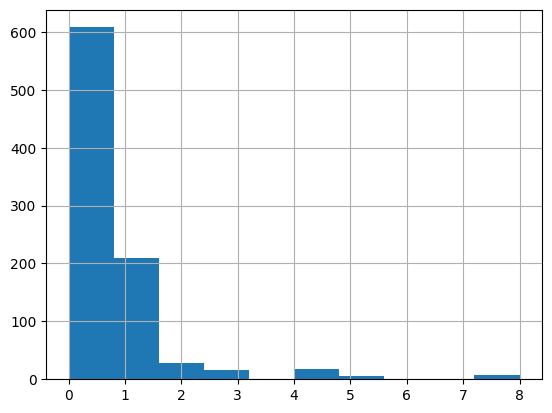

In [ ]:
df['SibSp'].hist()

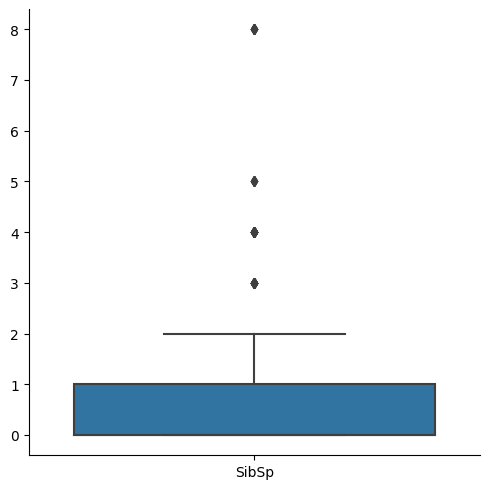

In [ ]:
# Boxplot per variable
sns.catplot(pd.DataFrame(df['SibSp']), kind='box')

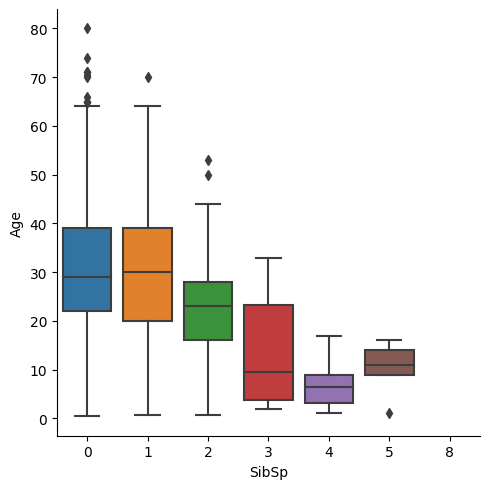

In [ ]:
# Distribution of SibSp by Age
sns.catplot(data=df, x="SibSp", y="Age", kind="box")

### ***Number of Parents/Children***

<Axes: >

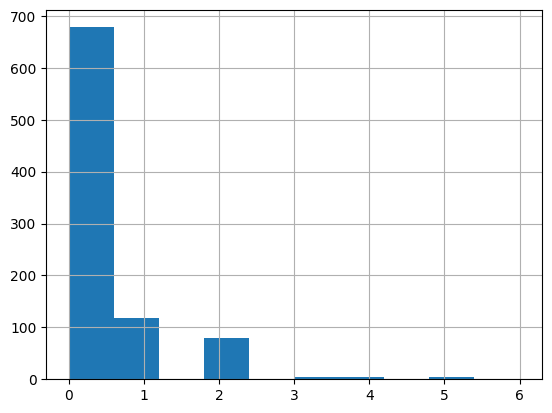

In [ ]:
df['Parch'].hist()

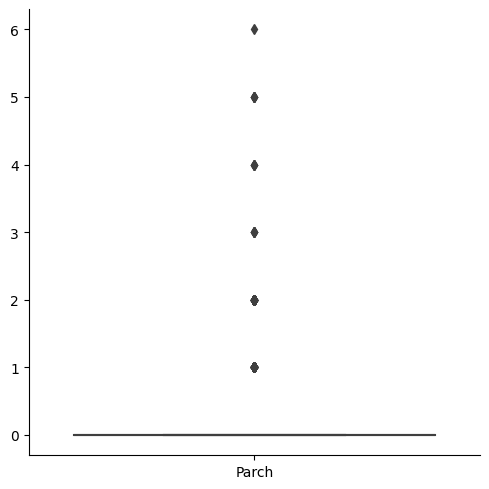

In [ ]:
# Boxplot per variable
sns.catplot(pd.DataFrame(df['Parch']), kind='box')

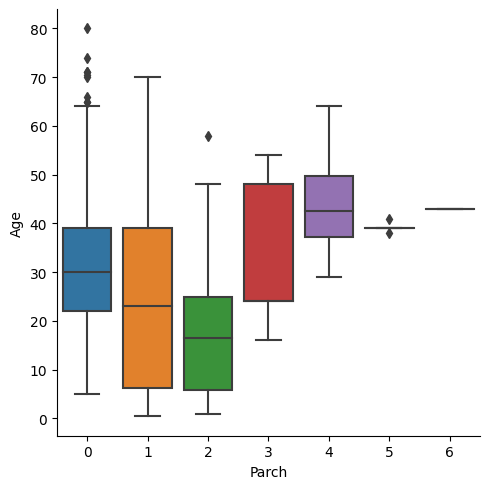

In [ ]:
# Distribution of Parch by Age
sns.catplot(data=df, x="Parch", y="Age", kind="box")

### ***Fare***

<Axes: >

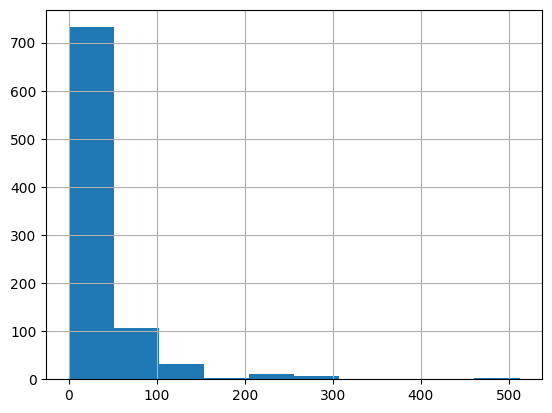

In [ ]:
df['Fare'].hist()

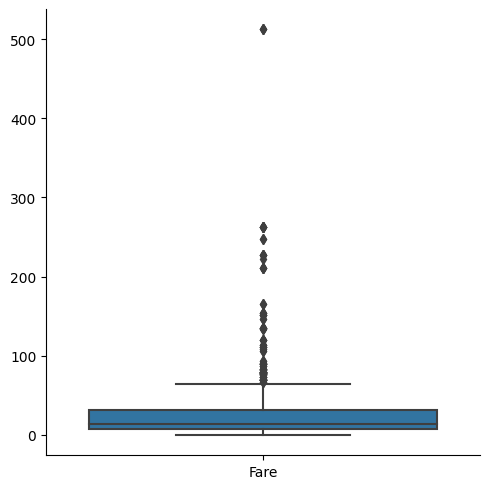

In [ ]:
# Boxplot per variable
sns.catplot(pd.DataFrame(df['Fare']), kind='box')

## **Outliers for Numerical Variables**

### **IQR Method**

In [ ]:
def find_outliers(variable):
    Q1 = np.percentile(variable, 25)
    Q3 = np.percentile(variable, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = variable[(variable < lower_bound) | (variable > upper_bound)]
    return outliers

fare_outliers = find_outliers(df['Fare'])
age_outliers = find_outliers(df['Age'])
sibsp_outliers = find_outliers(df['SibSp'])
parch_outliers = find_outliers(df['Parch'])

In [ ]:
print("Fare outliers: \n", fare_outliers)

Fare outliers: 
 PassengerId
2       71.2833
28     263.0000
32     146.5208
35      82.1708
53      76.7292
         ...   
847     69.5500
850     89.1042
857    164.8667
864     69.5500
880     83.1583
Name: Fare, Length: 116, dtype: float64


In [ ]:
print("Age outliers: \n", age_outliers) # None outliers shown with the IQR Method

Age outliers: 
 Series([], Name: Age, dtype: float64)


In [ ]:
print("SibSp outliers: \n", sibsp_outliers)

SibSp outliers: 
 PassengerId
8      3
17     4
25     3
28     3
51     4
60     5
64     3
69     4
72     5
86     3
89     3
120    4
160    8
165    4
172    4
177    3
181    8
183    4
202    8
230    3
234    4
262    4
267    4
279    4
325    8
342    3
375    3
387    5
410    3
481    5
486    3
542    4
543    4
635    3
643    3
684    5
687    4
727    3
788    4
793    8
814    4
820    3
825    4
847    8
851    4
864    8
Name: SibSp, dtype: int64


<Axes: >

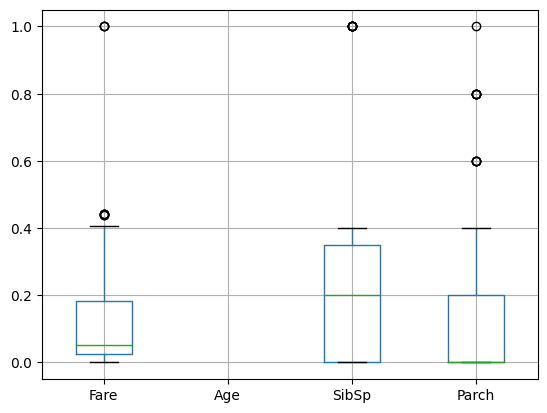

In [ ]:
df_num_outliers = pd.concat([fare_outliers, age_outliers, sibsp_outliers, parch_outliers], axis = 1)
minmax_scaling(df_num_outliers).boxplot()

In [ ]:
print("Parch outliers: \n", parch_outliers)

Parch outliers: 
 PassengerId
8      1
9      2
11     1
14     5
17     1
      ..
872    1
880    1
881    1
886    5
889    2
Name: Parch, Length: 213, dtype: int64


#### Histograms

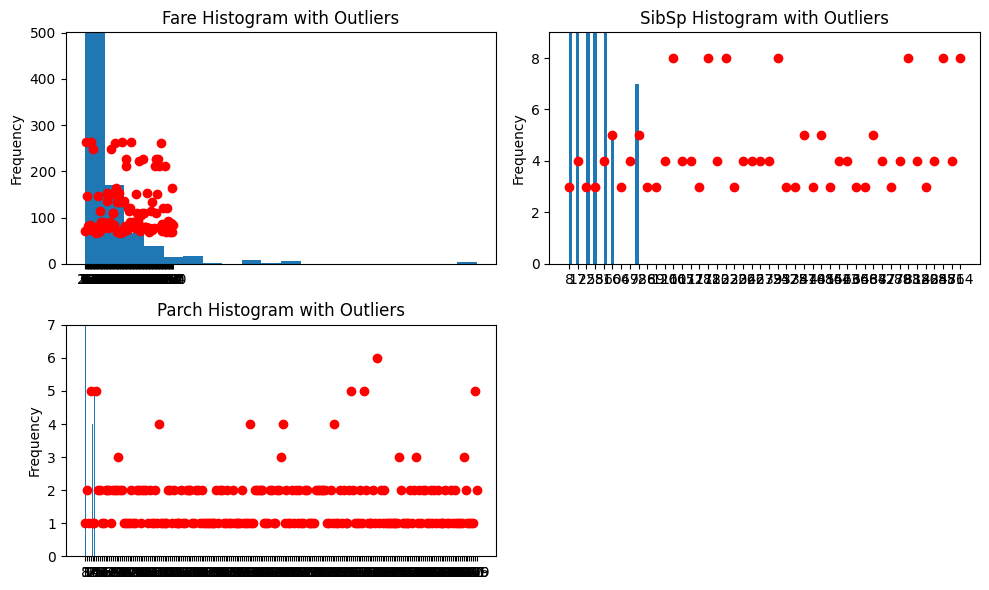

In [ ]:
plt.figure(figsize=(10, 6))

# Fare
plt.subplot(221)
plt.hist(df['Fare'], bins=20)
plt.scatter(fare_outliers.index, fare_outliers.values, color='red', label='Outliers')
plt.title('Fare Histogram with Outliers')
plt.ylabel('Frequency')
plt.ylim(0, 501)

# SibSp
plt.subplot(222)
plt.hist(df['SibSp'], bins=20)
plt.scatter(sibsp_outliers.index, sibsp_outliers.values, color='red', label='Outliers')
plt.title('SibSp Histogram with Outliers')
plt.ylabel('Frequency')
plt.ylim(0, 9)

# Parch
plt.subplot(223)
plt.hist(df['Parch'], bins=20)
plt.scatter(parch_outliers.index, parch_outliers.values, color='red', label='Outliers')
plt.title('Parch Histogram with Outliers')
plt.ylabel('Frequency')
plt.ylim(0, 7)

plt.tight_layout()
plt.show()

#### Scatter Plots

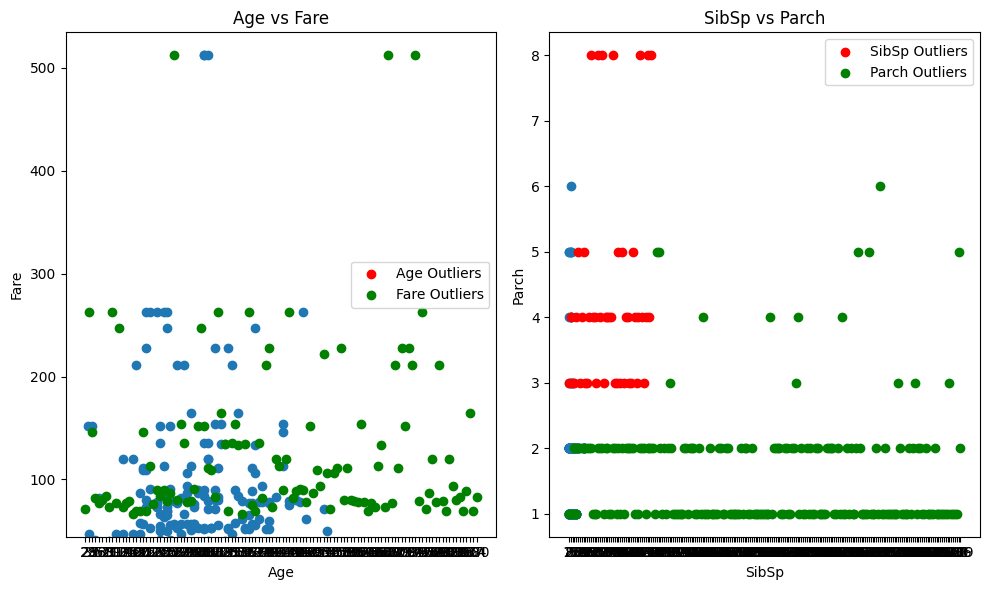

In [ ]:
plt.figure(figsize=(10, 6))

# Age vs Fare

plt.subplot(121)
plt.scatter(df['Age'], df['Fare'])
plt.scatter(age_outliers.index, age_outliers.values, color='red', label='Age Outliers') # None outliers
plt.scatter(fare_outliers.index, fare_outliers.values, color='green', label='Fare Outliers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.title('Age vs Fare')

# SibSp vs Parch

plt.subplot(122)
plt.scatter(df['SibSp'], df['Parch'])
plt.scatter(sibsp_outliers.index, sibsp_outliers.values, color='red', label='SibSp Outliers')
plt.scatter(parch_outliers.index, parch_outliers.values, color='green', label='Parch Outliers')
plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.legend()
plt.title('SibSp vs Parch')

plt.tight_layout()
plt.show()

### **Maximum Standar Deviations**

In [ ]:
df_num_outliers = df.copy()
for column in numerical[1:]:
  df_num_outliers = df_num_outliers[abs(stats.zscore(df_num_outliers[column])) < 3]
df_num_outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,Rev
888,1,1,female,19.0,0,0,30.0000,S,Miss
889,0,3,female,NaN,1,2,23.4500,S,Miss


<Axes: >

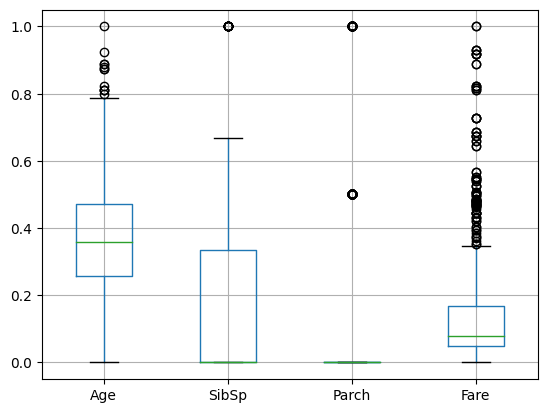

In [ ]:
minmax_scaling(df_num_outliers[numerical]).boxplot()

## **Description of Categorical Variables**

In [ ]:
# Mode for Categorical Values
df[categorical].mode()

,Pclass,Sex,Embarked,Title
0,3,male,S,Mr


In [ ]:
# Distribution
columns = categorical
for col in columns:
  print('-------------------------------------------')
  print(col)
  print(df[col].value_counts())

-------------------------------------------
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: Int64
-------------------------------------------
Sex
male      577
female    314
Name: Sex, dtype: Int64
-------------------------------------------
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: Int64
-------------------------------------------
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
              1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: Int64


In [ ]:
survived_df = df[df['Survived'] == 1]

### **Pclass**

<Axes: >

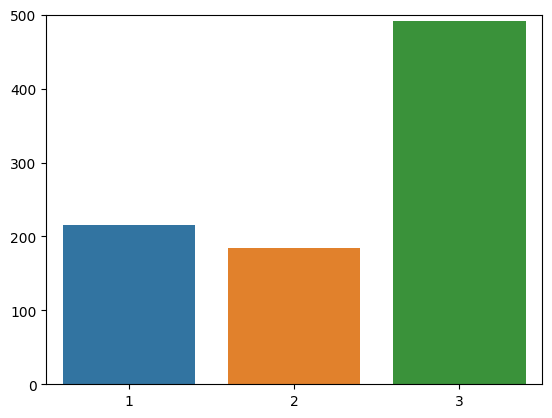

In [ ]:
# Distribution of Pclass
class_distribution = df['Pclass'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, order = ['1', '2', '3'])
ax.set_ylim([0, 500])
ax

<Axes: >

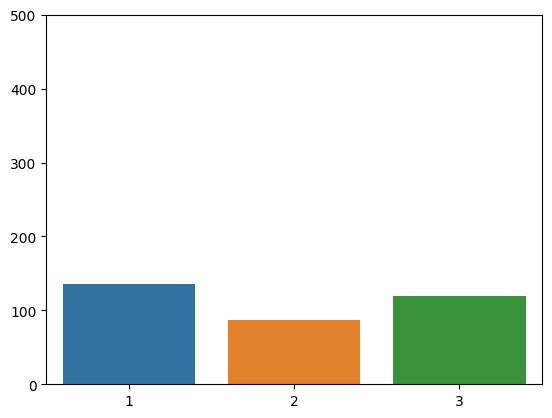

In [ ]:
# Survivors per class
class_distribution = survived_df['Pclass'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, order = ['1', '2', '3'])
ax.set_ylim([0, 500])
ax

### **Sex**

<Axes: >

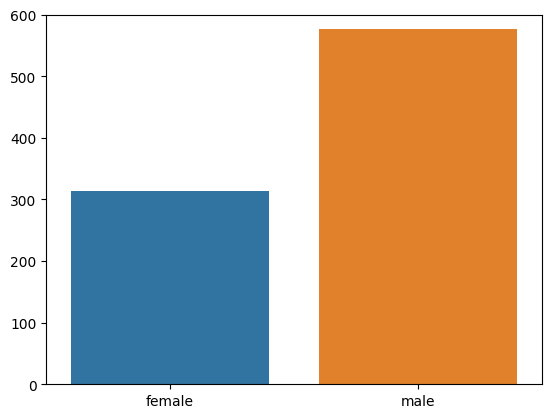

In [ ]:
# Distribution of Sex
class_distribution = df['Sex'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, order = ['female', 'male'])
ax.set_ylim([0, 600])
ax

<Axes: >

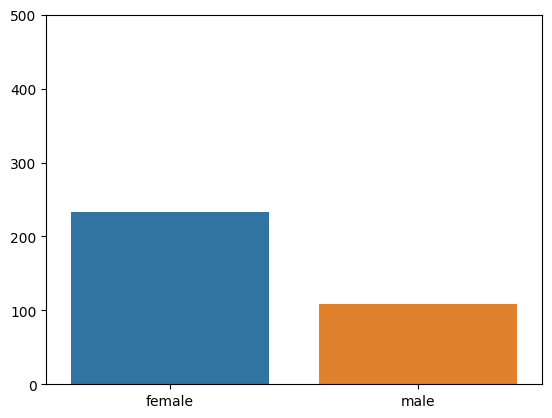

In [ ]:
# Survivors per sex
class_distribution = survived_df['Sex'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, order = ['female', 'male'])
ax.set_ylim([0, 500])
ax

###**Embarked**

<Axes: >

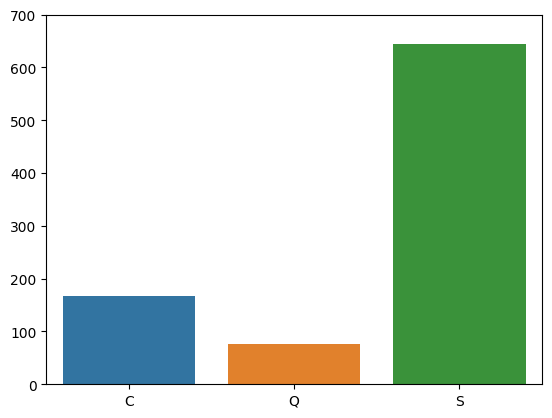

In [ ]:
# Distribution of Embarked
class_distribution = df['Embarked'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, order = ['C', 'Q', 'S'])
ax.set_ylim([0, 700])
ax

<Axes: >

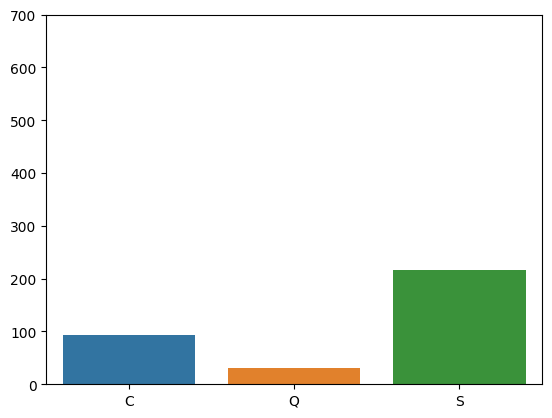

In [ ]:
# Survivors per category
class_distribution = survived_df['Embarked'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, order = ['C', 'Q', 'S'])
ax.set_ylim([0, 700])
ax

### **Title**

<Axes: >

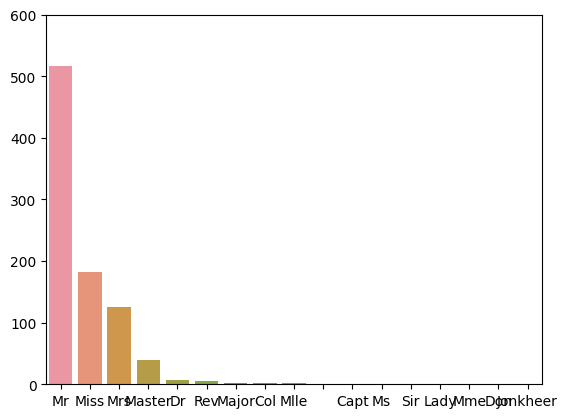

In [ ]:
# Distribution of Title
class_distribution = df['Title'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values)
ax.set_ylim([0, 600])
ax

<Axes: >

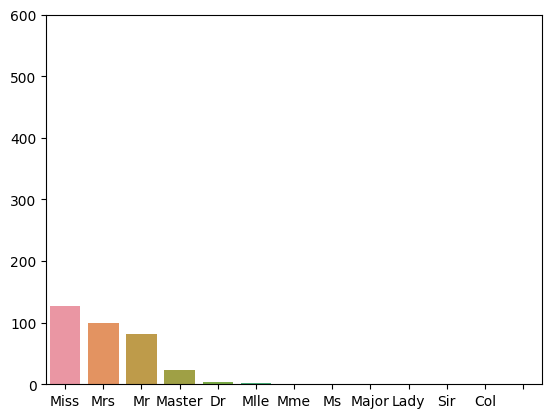

In [ ]:
# Survivors per Title
class_distribution = survived_df['Title'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values)
ax.set_ylim([0, 600])
ax

### **Survived**

<Axes: >

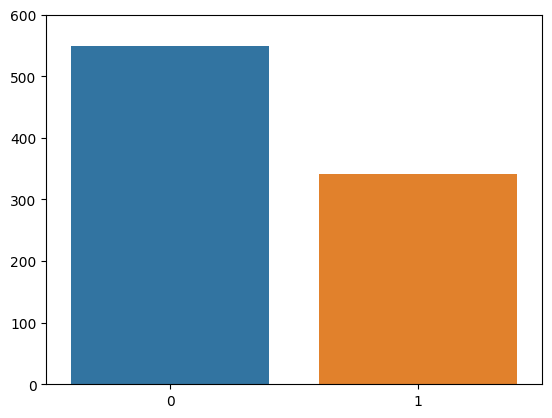

In [ ]:
# Distribution of Survived
class_distribution = df['Survived'].value_counts()
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values)
ax.set_ylim([0, 600])
ax

## **Outliers for Categorical Variables**

In [ ]:
# Deleting the values that have a frequency less than 10 in "Title"
categorical_df = df_num_outliers.copy()
print("Values after outliers cleaning")
print("-------------------------------------")
categories_freq = categorical_df['Title'].value_counts()
frecuencia_df = pd.DataFrame({'Categoria': categories_freq.index, 'Frecuencia': categories_freq.values})

# Creating list of categories with less than 10 instances
delete_categories = frecuencia_df[frecuencia_df['Frecuencia'] <= 10]['Categoria']

# Deleting instances with irrelevant categories
df_cat_outliers = categorical_df[~categorical_df['Title'].isin(delete_categories)]
df_cat_outliers['Title'].value_counts()


Values after outliers cleaning
-------------------------------------


Mr        500
Miss      163
Mrs       111
Master     26
Name: Title, dtype: Int64

As it can be noticed, there are some categorical values that only have one person or it's used only once or seven times. For example, in "Title" there is only one "Sir", one "Lady", etc. Those values won't be useful for the analysis and that's why these rows were deleted. In the other categorical variables such as "Embarked" and "Sex" the values frequency were all greater than 10, so we didn't delete any row in this section.

## **Encoding of Categorical Values**

In [ ]:
df_cat_outliers['Title'].value_counts()

Mr        500
Miss      163
Mrs       111
Master     26
Name: Title, dtype: Int64

In [ ]:
def one_hot_encoding(dataframe):
  # Get Dummies
  result = pd.DataFrame()
  for column in categorical:
    encoded = pd.get_dummies(dataframe[column])

    # Renaming variables to know their origin column
    for name in encoded.columns:
      encoded = encoded.rename(columns = {name: f"{column}_{name}"})

    result = pd.concat([result, encoded], axis=1)

  df_encoded = pd.concat([dataframe, result], axis = 1)
  df_encoded = df_encoded.drop(categorical, axis = 1)

  return df_encoded

df_encoded = one_hot_encoding(df_cat_outliers)
df_encoded


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0
2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,25.0,0,0,7.0500,0,0,1,0,1,0,0,1,0,0,1,0
888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1,0,1,0,0
889,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1,0,1,0,0


## **Missing Values (Imputation Techniques)**

When trying to train a model and make predictions based on the training set it is of vital importance to have good quality data as well as a good amount of it. This is why we are in dire need to impute the missing data on the ages, a feature that we consider to be determinant. For this process we will try 3 methods to impute it and then try to make predictions on the training set in order to evaluate which imputing method was the most effective.

### **KNN Imputation**

In [ ]:
from sklearn.impute import KNNImputer

def knn_imputation(df):
    features = df[['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp', 'Fare']]
    imputer = KNNImputer(n_neighbors=5)
    imputed_values = imputer.fit_transform(features)
    df['Age'] = imputed_values[:, 0]
    return df

df_encoded_knn = knn_imputation(df_encoded.copy())


### **Random Forest Imputation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def model_based_imputation(df):
    train_data = df.dropna(subset=['Age'])
    test_data = df[df['Age'].isnull()]

    X_train = train_data[['Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp', 'Fare']]
    y_train = train_data['Age']
    X_test = test_data[['Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp', 'Fare']]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predicted_ages = model.predict(X_test)

    df.loc[df['Age'].isnull(), 'Age'] = predicted_ages
    return df

df_encoded_rf = model_based_imputation(df_encoded.copy())


### **Mean Imputation**

In [ ]:
def mean_imputation(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    return df

df_encoded_mean = mean_imputation(df_encoded.copy())


### **Median Imputation**

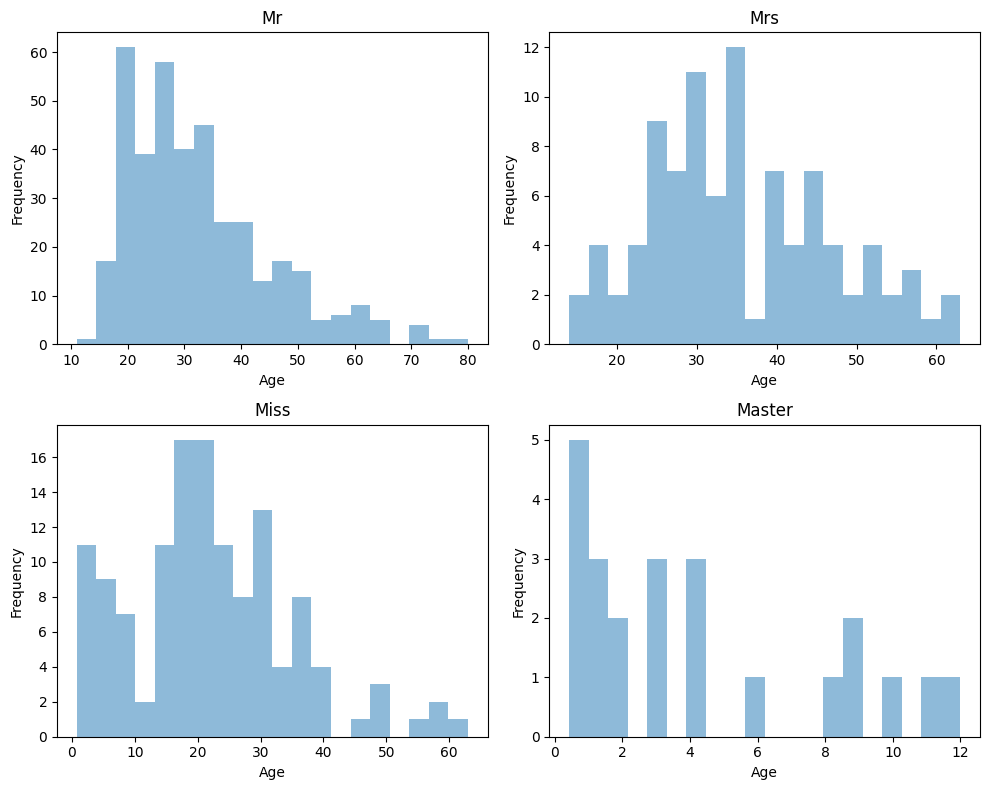

In [ ]:
df_age = df_cat_outliers.copy()
df_age = df_age[df_age['Age'].notna()]

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2x2 array of axes for easier indexing
axes = axes.flatten()

# Iterate through titles and create histograms in separate subplots
for idx, title in enumerate(df_age['Title'].unique()):
    title_data = df_age[df_age['Title'] == title]
    ax = axes[idx]
    ax.hist(title_data['Age'], bins=20, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
for title in df_age['Title'].unique():
  title_df = df_age [df_age['Title'] == title]
  print(title, ' ------------------------------')
  print('Skewness: ', title_df['Age'].skew())
  ad_test = 0
  print('Anderson-Darling: ', stats.anderson(title_df['Age']))

Mr  ------------------------------
Skewness:  1.0664968267867385
Anderson-Darling:  AndersonResult(statistic=8.69117263207329, critical_values=array([0.57 , 0.649, 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=32.483160621761655, scale=12.639316164310724)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Mrs  ------------------------------
Skewness:  0.39413652775507224
Anderson-Darling:  AndersonResult(statistic=0.6174214435956031, critical_values=array([0.554, 0.631, 0.757, 0.883, 1.05 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=35.5531914893617, scale=11.555957381160404)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Miss  ------------------------------
Skewness:  0.5824283696175657
Anderson-Darling:  AndersonResult(statistic=1.0681364866585454, critical_values=array([0.56 , 0.637, 0.765,

According to the Anderson-Darling, we can discard the null hypothesis (normality of the data) for every *Title* value, except for *Mrs*. Due to this, and the skewness in every category, it is better to use the median for imputation of values instead of the mean.

We will then compute the median per category and fill the missing values according to that:

In [ ]:
# Fill NaN values in 'Age' according to 'Title
df_median = df_cat_outliers.copy()
for title in df_median['Title'].unique():
  median = df_median[df_median['Title'] == title]['Age'].median()
  df_median.loc[(df_median['Title'] == title) & (df_median['Age'].isna()), 'Age'] = median

df_encoded_median = one_hot_encoding(df_median)
df_encoded_median

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0
2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,25.0,0,0,7.0500,0,0,1,0,1,0,0,1,0,0,1,0
888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1,0,1,0,0
889,0,21.5,1,2,23.4500,0,0,1,1,0,0,0,1,0,1,0,0


In [ ]:
df_encoded_median.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

### **Evaluation of Methods**

For the evaluation of these methods, a logistic regression was applied in order to see the performance of each method.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def evaluate_model(X, y):
    model = LogisticRegression(max_iter=1000, random_state=42)
    return cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

y = df_encoded['Survived']

X_encoded = df_encoded.drop('Survived', axis=1)

X_knn = knn_imputation(X_encoded.copy())
knn_accuracy = evaluate_model(X_knn, y)

X_rf = model_based_imputation(X_encoded.copy())
rf_accuracy = evaluate_model(X_rf, y)

X_mean = mean_imputation(X_encoded.copy())
mean_accuracy = evaluate_model(X_mean, y)

X_median = df_encoded_median[df_encoded_median.columns[1:]]
median_accuracy = evaluate_model(X_median, y)

results = {
    'KNN Imputation': knn_accuracy,
    'Random Forest Imputation': rf_accuracy,
    'Mean Imputation': mean_accuracy,
    'Median Imputation': median_accuracy
}


print(f"{'Imputation Method':<25} | {'Accuracy':<10}")
print("=" * 40)

for method, accuracy in results.items():
    print(f"{method:<25} | {accuracy:<10.4f}")



Imputation Method         | Accuracy  
KNN Imputation            | 0.8238    
Random Forest Imputation  | 0.8275    
Mean Imputation           | 0.8250    
Median Imputation         | 0.8287    


As we can see above, the results are very close to each other and if ran several times the experiment the deviation between the results given by the random forest are the beter than KNN Imputation and Mean Imputation but not by much. Median imputation is the method with best results, however, in order to enhance the precission of our predictions at the maximum, the Random Forest method has been chosen for the data imputation for the ages.

## **Duplicates**

In [ ]:
new_df = df_encoded_rf.drop_duplicates(keep = 'first')
new_df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
PassengerId,,,,,,,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0
2,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1
3,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0
4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1
5,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,28.000000,0,0,10.5000,0,1,0,0,1,0,0,1,0,0,1,0
888,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1,0,1,0,0
889,0,21.975333,1,2,23.4500,0,0,1,1,0,0,0,1,0,1,0,0


## **Correlation Among All Variables**

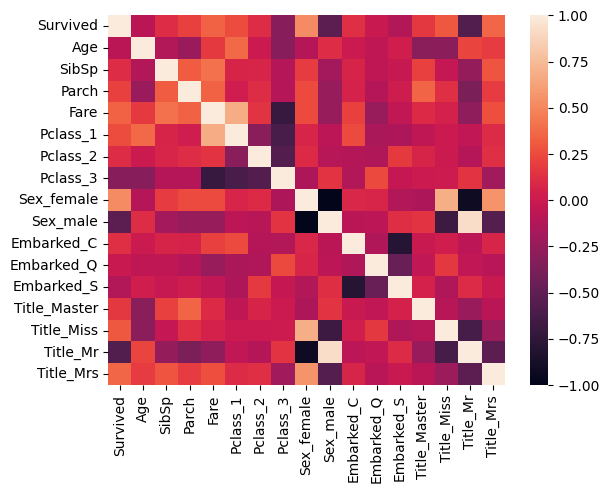

In [ ]:
# Spearman coeficient for relations between categorical and numerical features
corr = new_df.corr(method = 'spearman')
sns.heatmap(corr)
plt.show()

Using only the absolute values of the heat map, we can more easily visualize the strength of the relation. To know whether it is negative or positive, we can check the correlation matrix, or the heat map above.

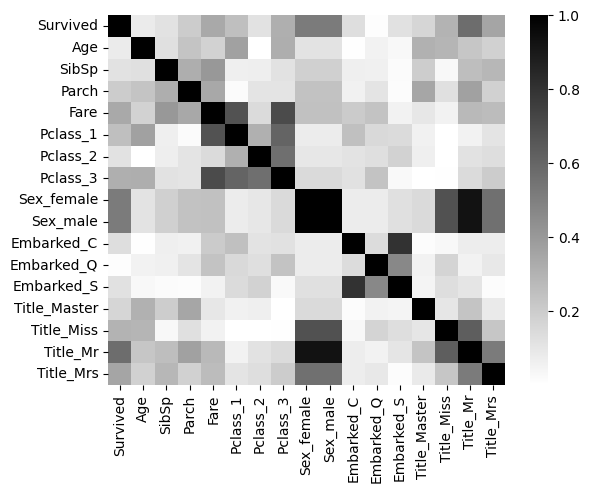

In [ ]:
sns.heatmap(abs(corr), cmap="gray_r")
plt.show()

As we can see, some of the pairs of variables that have a strong correlation with the variable *Survived* are *Title_Mr* (negative), *Sex_female* (positive) and *Sex_male* (negative). A less strong correlation, but still existant, can be observed between *Survival* and *Fare*, *Pclass_3*, *Title_Ms* and *Title_Mrs*.

Due to the strong correlation between some of those features (such as *Title_Mr* and *Sex_male*) we can opt to eliminate one of them in the Feature Selection process.
